In [147]:
import cloudmetrics
import numpy as np
import wradlib as wrl
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import matplotlib as mpl
import glob
import cv2
import os
import matplotlib.colors as mcolors
import math
import seaborn as sns
import re

In [6]:
arr = np.array([[0,1,1,0],
      [0,1,1,0],
      [0,1,1,0]])
print(type(arr))
print(cloudmetrics.mask.cloud_fraction(mask=arr))

<class 'numpy.ndarray'>
0.5


In [87]:
help(cloudmetrics.objects.metrics.num_objects)

Help on function num_objects in module cloudmetrics.objects.metrics.num_objects:

num_objects(object_labels)
    Compute number of labelled objects
    
    Parameters
    ----------
    object_labels : 2-d numpy array
        Field of labelled objects.
    
    Returns
    -------
    object_number
        Number of labelled objects.



In [75]:
dataFromTxt = np.loadtxt(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\WerteKostenfunktion_Cluster_Attribut0_2023-06-19_04-58-35.txt", dtype=int)
i = 0
maxI = dataFromTxt.size
dataArray = np.full((2, maxI), 0)
while i < maxI:
    dataArray[0][i] = dataFromTxt[i]
    i += 1

dataFromTxt = np.loadtxt(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\WerteKostenfunktion_Cluster_Attribut1_2023-06-19_04-58-35.txt", dtype=int)
i = 0
maxI = dataFromTxt.size
while i < maxI:
    dataArray[1][i] = dataFromTxt[i]
    i += 1
    
dataFromTxt = np.loadtxt(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\WerteKostenfunktion_Cluster_Attribut2_2023-06-19_04-58-35.txt", dtype=int)
dataFromTxt2 = np.loadtxt(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\WerteKostenfunktion_Cluster_Attribut2_2023-06-19_15-57-07.txt", dtype=int)
i = 0
maxI = dataFromTxt.size
maxI2 = dataFromTxt2.size
dataArray2 = np.full((2, maxI+maxI2), 0)
while i < maxI:
    dataArray2[0][i] = dataFromTxt[i]
    i += 1
i = 0
while i < maxI2:
    dataArray2[0][maxI+i] = dataFromTxt2[i]
    i += 1

dataFromTxt = np.loadtxt(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\WerteKostenfunktion_Cluster_Gesamt_2023-06-19_04-58-35.txt", dtype=int)
dataFromTxt2 = np.loadtxt(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\WerteKostenfunktion_Cluster_Gesamt_2023-06-19_15-57-07.txt", dtype=int)
i = 0
maxI = dataFromTxt.size
maxI2 = dataFromTxt2.size
while i < maxI:
    dataArray2[1][i] = dataFromTxt[i]
    i += 1
i = 0
while i < maxI2:
    dataArray2[1][maxI+i] = dataFromTxt2[i]
    i += 1

In [76]:
def plot1():
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (32,8))
    for clusterNr in range(2):
        X = []
        Y = []
        for x in range(dataArray[clusterNr].size):
            X.append(x+2)
            Y.append(dataArray[clusterNr][x])
        df = pd.DataFrame({'X': X,'Y': Y})
        # use the seaborn hue statement to differentiate the different species
        sns.scatterplot(ax=ax[clusterNr], x="X", y="Y", data = df,s=100)
        #plt.ylim(0, 1501)
        #plt.xlim(0, 1501)
        ax[clusterNr].set_xlabel("k")
        ax[clusterNr].set_ylabel("kosten")
        #ax[clusterNr].legend(fontsize=12)

    plt.show()
    
def plot2():
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (32,8))
    for clusterNr in range(2):
        X = []
        Y = []
        for x in range(dataArray2[clusterNr].size):
            X.append(x+2)
            Y.append(dataArray2[clusterNr][x])
        df = pd.DataFrame({'X': X,'Y': Y})
        # use the seaborn hue statement to differentiate the different species
        sns.scatterplot(ax=ax[clusterNr], x="X", y="Y", data = df,s=100)
        #plt.ylim(0, 1501)
        #plt.xlim(0, 1501)
        ax[clusterNr].set_xlabel("k")
        ax[clusterNr].set_ylabel("kosten")
        #ax[clusterNr].legend(fontsize=12)

    plt.show()

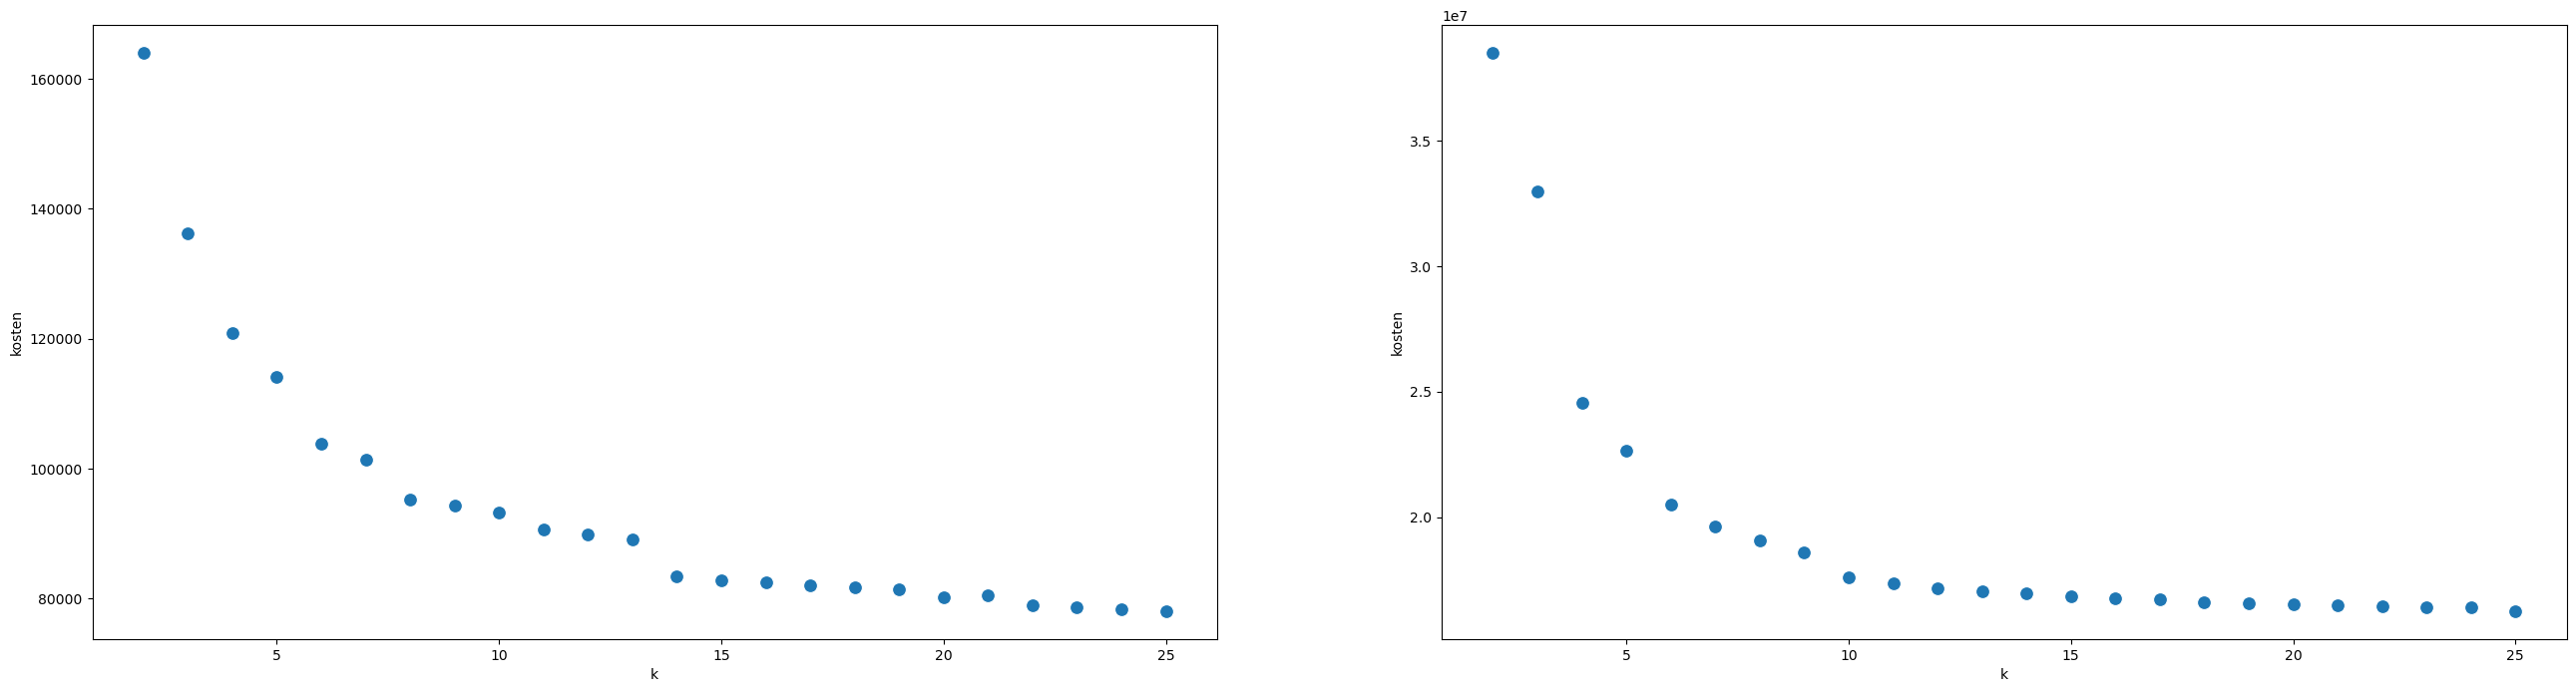

In [77]:
plot1()

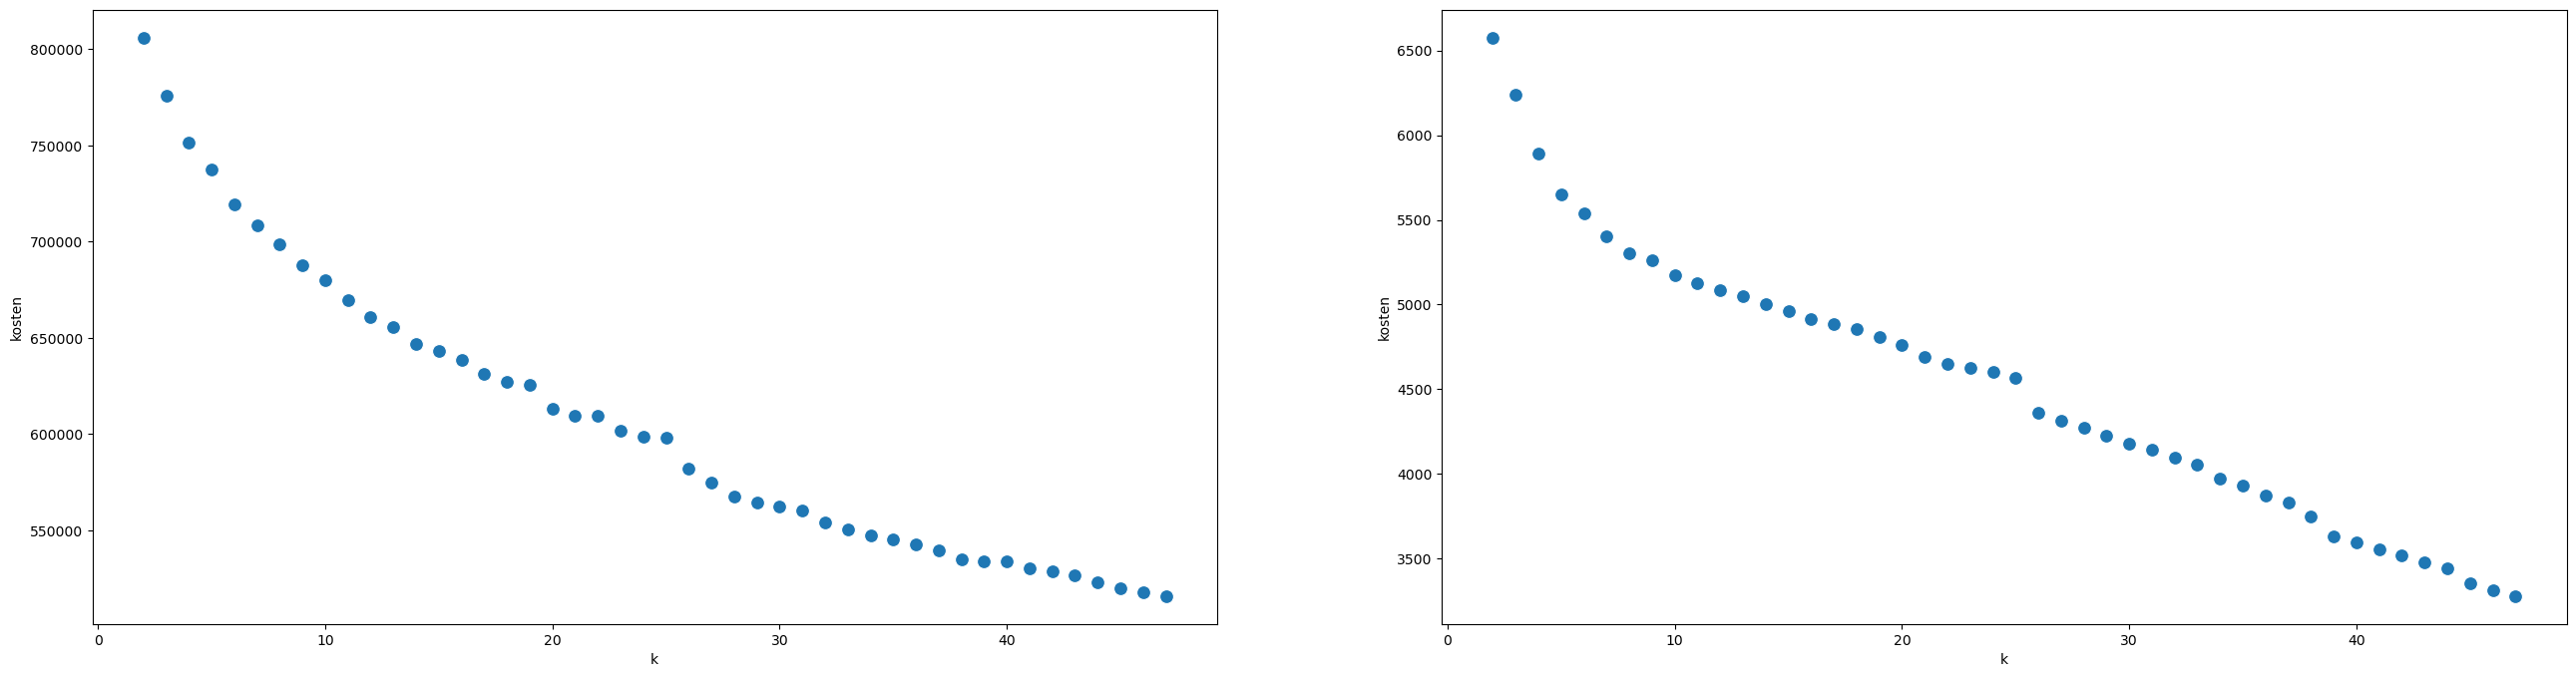

In [78]:
plot2()

In [140]:
def readInCluster(path,nrCluster,nrMemeberCLuster):    
    dataFromTxt = np.genfromtxt(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\k_5_cluster_Attribut0_2023-06-19_04-21-25.txt", delimiter='\t', dtype=str)
    nrCluster = 5
    nrMemeberCLuster = 5
    clusterMembers = np.full((nrCluster, nrMemeberCLuster), 0)
    z = 0
    currCluster = 0
    for i in range(nrCluster):
        for j in range(nrMemeberCLuster):
            if z < 5:
                clusterMembers[currCluster][z] = dataFromTxt[i].split()[j]
                z += 1
            if z == 5:
                z = 0
                currCluster += 1
                
    return clusterMembers

In [196]:
clusterMembers

array([[ 65,  14,  45,  64,  83],
       [ 75,  27,  56,  79,  93],
       [120,   3,   4,   5,  10],
       [ 57,   0,   1,   2,   6],
       [140,  15,  30,  32,  43]])

In [ ]:
directory = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\zeitreihen"

In [218]:
def getGraphCompFilenames(clusterMembers):
    directoryZeitreihen = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\zeitreihen"
    directoryGraphComponents = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\comparingProcessedData\calculateDistance"

    clusterMemberGraphCompFiles = [[]]
    for cluster in range(len(clusterMembers)-1):
        clusterMemberGraphCompFiles.append([])

    for cluster in range(len(clusterMembers)):
        for z in range(len(clusterMembers[0])):
            for filename in os.listdir(directoryZeitreihen):

                fZeitreihe = os.path.join(directoryZeitreihen, filename)

                if "graphNr"+str(clusterMembers[cluster][z])+"_" in str(fZeitreihe) and "attributNr0" in str(fZeitreihe):
                    subpattern = re.findall(r"\D(\d{8})\D", str(fZeitreihe))[0]
                    graphCompFilename = subpattern + str(fZeitreihe).split(subpattern)[1]

                    clusterMemberGraphCompFiles[cluster].append(graphCompFilename)
    
    return clusterMemberGraphCompFiles
                

In [ ]:
def 

In [219]:
getGraphCompFilenames(clusterMembers)


[['20170801._component1_dbz25Interpol_1000.txt',
  '20170603._component22_dbz25Interpol_1000.txt',
  '20170710._component0_dbz25Interpol_1000.txt',
  '20170801._component0_dbz25Interpol_1000.txt',
  '20180513._component0_dbz25Interpol_1000.txt'],
 ['20170802._component1_dbz25Interpol_1000.txt',
  '20170622._component3_dbz25Interpol_1000.txt',
  '20170710._component6_dbz25Interpol_1000.txt',
  '20170802._component5_dbz25Interpol_1000.txt',
  '20180516._component0_dbz25Interpol_1000.txt'],
 ['20180607._component11_dbz25Interpol_1000.txt',
  '20170603._component12_dbz25Interpol_1000.txt',
  '20170603._component13_dbz25Interpol_1000.txt',
  '20170603._component14_dbz25Interpol_1000.txt',
  '20170603._component19_dbz25Interpol_1000.txt'],
 ['20170710._component7_dbz25Interpol_1000.txt',
  '20170603._component0_dbz25Interpol_1000.txt',
  '20170603._component10_dbz25Interpol_1000.txt',
  '20170603._component11_dbz25Interpol_1000.txt',
  '20170603._component15_dbz25Interpol_1000.txt'],
 ['2018

In [162]:
s = "graphNr0_attributNr2_20170603._component0_dbz25Interpol_1000.txt"
d = re.findall(r"\D(\d{8})\D", s)[0]
print(d)
s.split(d)

20170603


['graphNr0_attributNr2_', '._component0_dbz25Interpol_1000.txt']

<class 'numpy.ndarray'>
   NrZhk0
0       4
1       5
2      13
3      14
4      11
5      18
6       7
7       7
8       5
9       5


<AxesSubplot:>

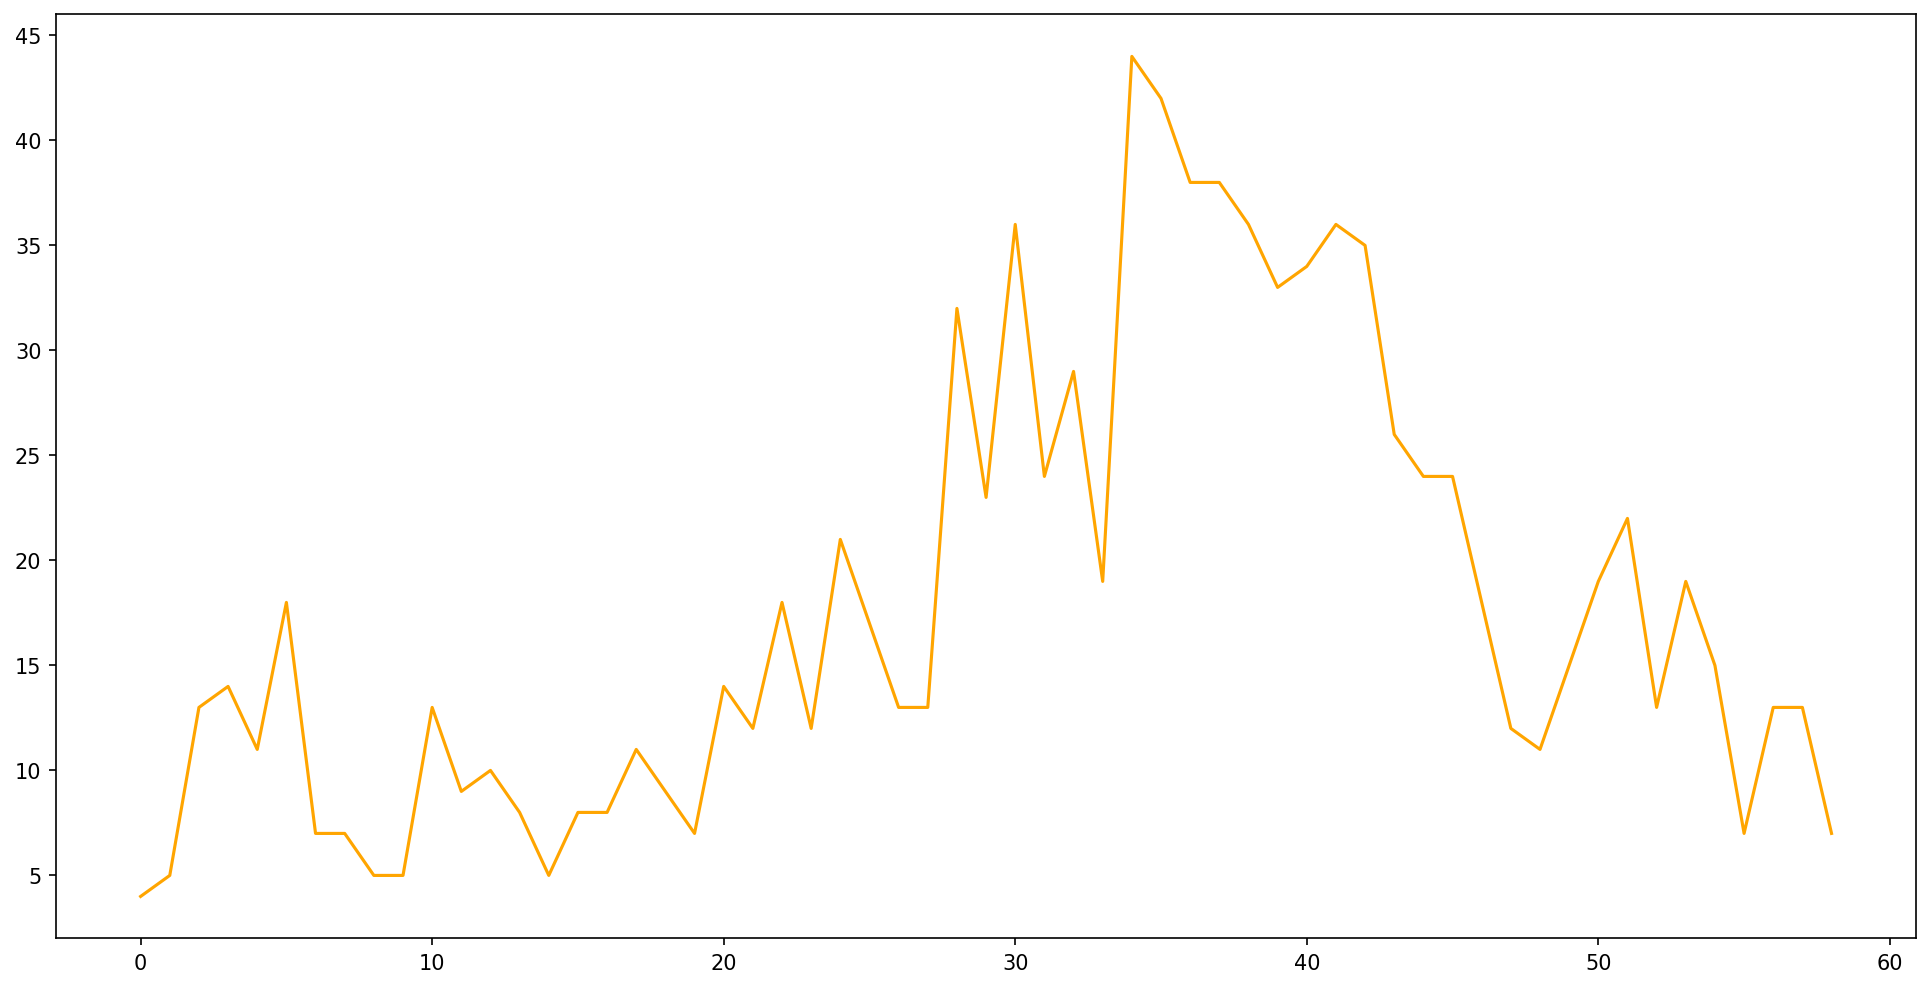

In [55]:
dataFromTxt = np.loadtxt(r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\zeitreihen\graphNr0_attributNr0_20170603._component0_dbz25Interpol_1000.txt", dtype=int)

print(type(dataFromTxt))

df = pd.DataFrame(dataFromTxt, columns = ['NrZhk'+str(0)])

print(df.head(10))

plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
df['NrZhk'+str(0)].plot(label='NrZhk', color='orange')

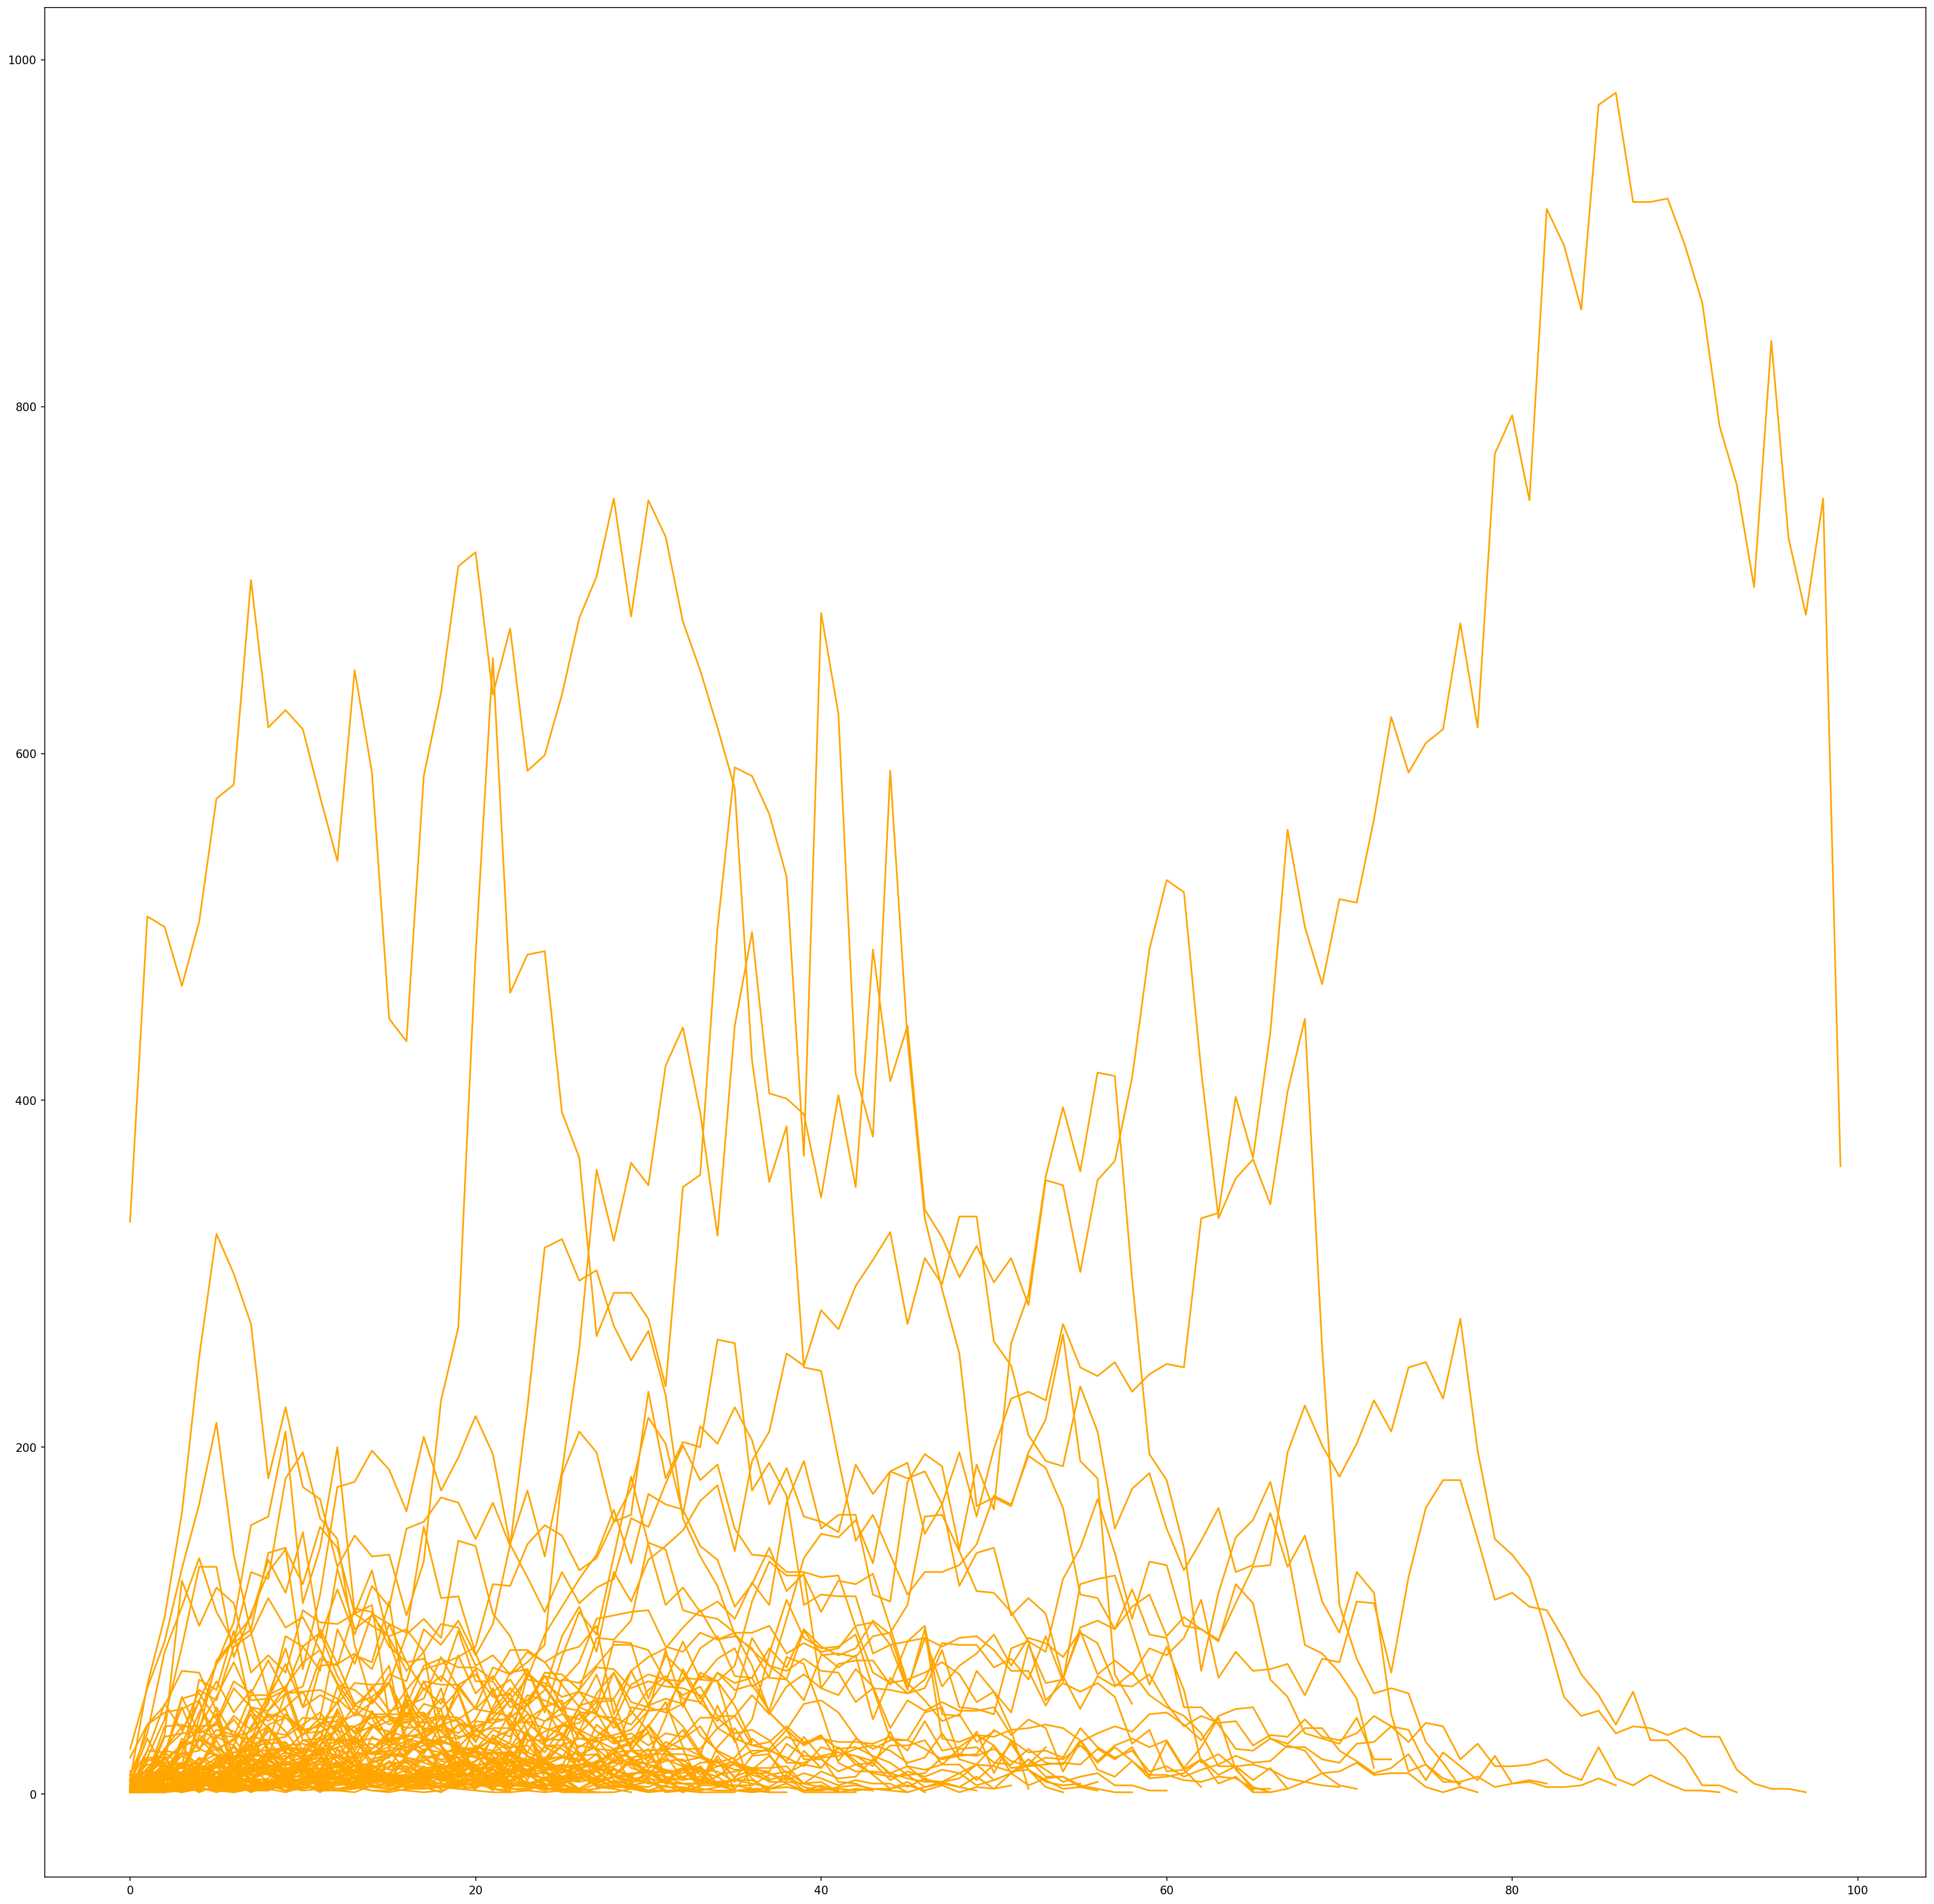

In [81]:
directory = r"C:\Users\Jonathan Langer\OneDrive\Bachelorarbeit\Experimentdaten\zeitreihen"
i = 0
plt.figure(figsize=(30, 30), dpi=150)
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    #if os.path.isfile(f):
        #print(f)
    #else:
     #   print("keine Dateien mehr vorhanden")
      #  break
    if "attributNr0" in str(f):
        dataFromTxt = np.loadtxt(f, dtype=int)
        #if dataFromTxt.size <= 300 and dataFromTxt[0] < 5000:
        if dataFromTxt.size <= 100 and i%2!=0:
            df = pd.DataFrame(dataFromTxt, columns = ['NrZhk'])
            df['NrZhk'].plot(label='NrZhk', color='orange')
        i += 1
        
#plt.figure(figsize=(16, 8), dpi=150)
#for z in range(i):
#    df['NrZhk'+str(z)].plot(label='NrZhk', color='orange')
        